# GRIPFEB21

# Devoloped by : Venkatesh Surampally

# Task 3

# Exploratory Data Analysis : Retail

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:>

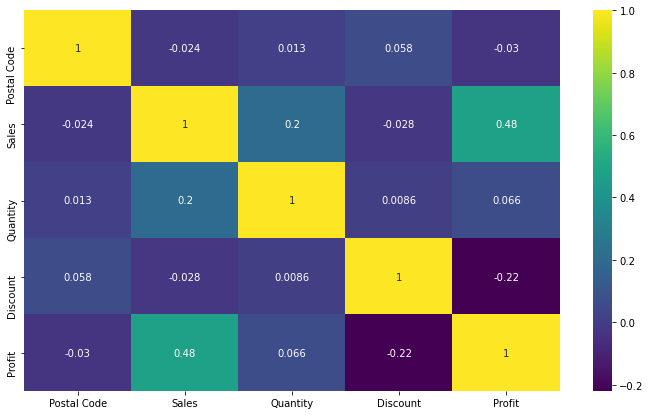

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [11]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

We can se that there is only one unique for country so we cannot expect much insights from this feature.

In [12]:
#dropping unnecessary column
df.drop(columns=['Country'],inplace=True)

# Lets analyse the profits for each feature.

1) Ship mode

In [13]:
df.groupby('Ship Mode')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
First Class,1538.0,31.839948,257.794233,-2639.9912,1.79145,8.7789,28.83195,6719.9808
Same Day,543.0,29.266591,226.689497,-3839.9904,2.15670,8.0270,29.56350,2229.0240
Second Class,1945.0,29.535545,152.822263,-1862.3124,2.59840,9.4284,33.21560,2799.9840
Standard Class,5968.0,27.494770,250.010543,-6599.9780,1.46720,8.3010,28.76580,8399.9760


<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

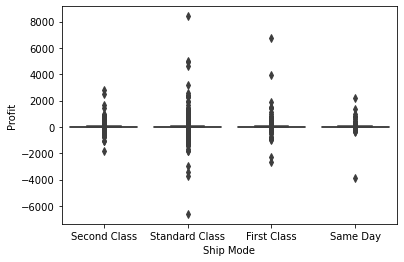

In [14]:
sns.boxplot(x='Ship Mode',y='Profit',data=df)

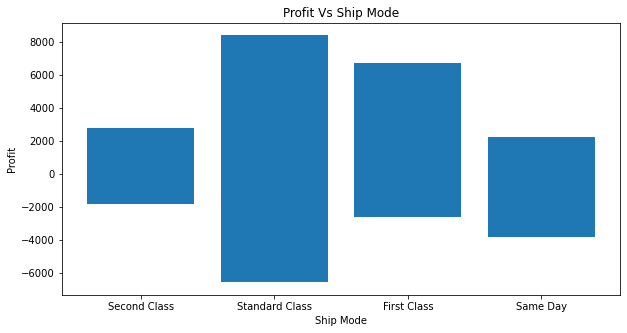

In [16]:
plt.figure(figsize=(10,5))
plt.bar(df['Ship Mode'],df['Profit'])
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.title('Profit Vs Ship Mode')
plt.show()

Observation:- Total number of counts is high for standard classes and whole profit is also high for this. Profit per count is highest for first class.

2) Segment

In [17]:
df.groupby('Segment')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Segment,,,,,,,,
Consumer,5191.0,25.836873,242.594020,-6599.9780,1.58355,8.3754,28.60670,6719.9808
Corporate,3020.0,30.456667,231.986266,-3839.9904,1.92840,8.6940,29.84350,8399.9760
Home Office,1783.0,33.818664,212.381482,-3399.9800,1.98425,9.1020,31.55985,3919.9888


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

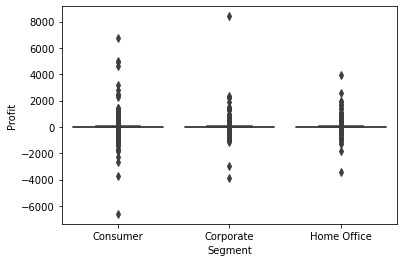

In [18]:
sns.boxplot(x='Segment',y='Profit',data=df)

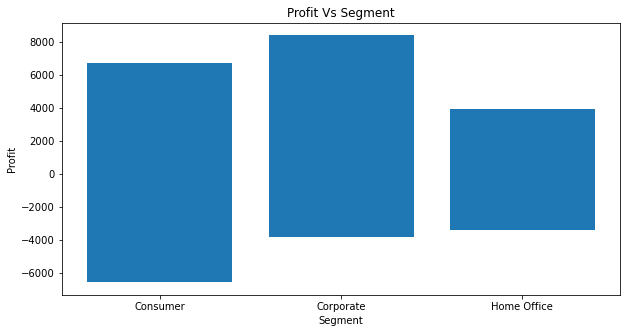

In [19]:
plt.figure(figsize=(10,5))
plt.bar(df['Segment'],df['Profit'])
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Profit Vs Segment')
plt.show()

Observation: - Overall profit is high for the consumer segment where profit per count is max for Home Office segment.

3) City

In [25]:
df1=df.groupby('City')['Profit'].describe()
df1

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Aberdeen,1.0,6.630000,NaN,6.6300,6.630000,6.63000,6.630000,6.6300
Abilene,1.0,-3.758400,NaN,-3.7584,-3.758400,-3.75840,-3.758400,-3.7584
Akron,21.0,-8.887410,37.225537,-80.9955,-20.448000,0.61920,5.776800,66.5408
Albuquerque,14.0,45.292007,44.986753,-5.6943,14.616450,27.68800,78.411525,138.3552
Alexandria,16.0,19.913644,25.611603,0.0000,6.581400,8.37355,17.092950,83.2810
...,...,...,...,...,...,...,...,...
Woonsocket,4.0,19.669775,4.016137,13.8915,18.566475,20.94880,22.052100,22.8900
Yonkers,15.0,184.517047,620.704272,-264.9208,8.767300,16.75080,87.874800,2400.9657
York,5.0,-20.433840,27.462464,-50.8704,-29.053600,-27.93120,-18.088200,23.7742


In [33]:
df1['Total profit']=df1['mean']*df1['count']
df1.sort_values('Total profit',ascending=False)
df2=df1.sort_values('Total profit',ascending=False)
df2

,count,mean,std,min,25%,50%,75%,max,Total profit
City,,,,,,,,,
New York City,915.0,67.799982,238.945301,-553.6476,5.282400,13.7880,40.707300,3919.9888,62036.9837
Los Angeles,747.0,40.750680,101.146352,-217.0480,5.222550,13.7340,33.851700,1049.9850,30440.7579
Seattle,428.0,68.121721,350.386799,-73.0548,4.921200,13.4406,39.703125,6719.9808,29156.0967
San Francisco,510.0,34.328207,83.739050,-325.5720,4.778700,11.7983,33.775900,944.9865,17507.3854
Detroit,115.0,114.624268,469.258125,0.2198,11.592000,30.0234,74.894600,4946.3700,13181.7908
...,...,...,...,...,...,...,...,...,...
Chicago,314.0,-21.192894,198.329309,-2929.4845,-14.769600,0.1547,6.030950,874.9875,-6654.5688
Lancaster,46.0,-157.371052,973.208371,-6599.9780,-12.440775,0.8764,10.982600,83.2097,-7239.0684
San Antonio,59.0,-123.712715,532.354157,-3701.8928,-27.816100,-6.2100,8.868450,117.4320,-7299.0502


Observation :- From New York City we can get max profits. Huge lossses are coming from Philadelphia it's better to make changes and try to increase the profits over there.

4) State

In [35]:
df1=df.groupby('State')['Profit'].describe()
df1.head()

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Alabama,61.0,94.865989,210.901876,0.0000,6.872400,16.87500,71.38980,1459.2000
Arizona,224.0,-15.303235,109.266267,-814.4832,-6.700125,2.53365,13.41360,211.4955
Arkansas,60.0,66.811452,123.249880,1.4190,6.549000,18.34080,71.62770,843.1706
California,2001.0,38.171608,97.691593,-325.5720,5.101500,13.30560,35.62380,1906.4850
Colorado,182.0,-35.867351,276.424024,-3399.9800,-7.940700,3.12480,10.40175,247.9960


In [37]:
df1['Total profit']=df1['mean']*df1['count']
df2=df1.sort_values('Total profit',ascending=False)
df2.head()

,count,mean,std,min,25%,50%,75%,max,Total profit
State,,,,,,,,,
California,2001.0,38.171608,97.691593,-325.5720,5.10150,13.30560,35.62380,1906.4850,76381.3871
New York,1128.0,65.637011,232.540498,-553.6476,5.66440,13.83960,42.13615,3919.9888,74038.5486
Washington,506.0,66.013146,325.305395,-73.0548,5.38285,13.44060,39.92220,6719.9808,33402.6517
Michigan,255.0,95.934069,374.559894,0.0000,8.48750,24.22560,70.24940,4946.3700,24463.1876
Virginia,224.0,83.026564,235.266720,0.0000,8.08540,19.18125,69.31845,2799.9840,18597.9504


In [38]:
df2=df1.sort_values('Total profit',ascending=True)
df2.head()

,count,mean,std,min,25%,50%,75%,max,Total profit
State,,,,,,,,,
Texas,985.0,-26.121174,189.022781,-3701.8928,-17.027400,0.3336,6.99860,624.9875,-25729.3563
Ohio,469.0,-36.186304,341.346473,-6599.9780,-13.393600,1.2390,7.70000,607.6080,-16971.3766
Pennsylvania,587.0,-26.507598,136.294675,-1665.0522,-17.599800,0.5840,5.94615,1119.9968,-15559.9603
Illinois,492.0,-25.625787,175.695233,-2929.4845,-18.398475,-1.8144,5.64780,874.9875,-12607.8870
North Carolina,249.0,-30.083985,297.900997,-3839.9904,-2.625600,3.9592,15.59040,303.8040,-7490.9122


Observation:- We are getting maximum profits from the state of California where as huge losses are occuring in the state of Texas.

5) Category

In [39]:
df1=df.groupby('Category')['Profit'].describe()
df1.head()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Furniture,2121.0,8.699327,136.049246,-1862.3124,-12.84900,7.7748,33.7266,1013.127
Office Supplies,6026.0,20.327050,164.887280,-3701.8928,2.10150,6.8824,19.4163,4946.370
Technology,1847.0,78.752002,428.816633,-6599.9780,5.20365,25.0182,74.8946,8399.976


In [41]:
df1['Total profit']=df1['mean']*df1['count']
df2=df1.sort_values('Total profit',ascending=False)
df2.head()

,count,mean,std,min,25%,50%,75%,max,Category,Total profit
Category,,,,,,,,,,
Technology,1847.0,78.752002,428.816633,-6599.9780,5.20365,25.0182,74.8946,8399.976,145454.9481,145454.9481
Office Supplies,6026.0,20.327050,164.887280,-3701.8928,2.10150,6.8824,19.4163,4946.370,122490.8008,122490.8008
Furniture,2121.0,8.699327,136.049246,-1862.3124,-12.84900,7.7748,33.7266,1013.127,18451.2728,18451.2728


Observation: - We are getting maximum profits from the Technology sector.

6) Subcategory

In [44]:
df1=df.groupby('Sub-Category')['Profit'].describe()
df1.head()

,count,mean,std,min,25%,50%,75%,max
Sub-Category,,,,,,,,
Accessories,775.0,54.111788,106.155455,-75.5958,5.77150,21.0000,57.355200,829.3754
Appliances,466.0,38.922758,148.319146,-1181.2824,4.06120,17.4465,56.113650,793.7160
Art,796.0,8.200737,13.384264,0.1533,1.68480,3.7236,8.677175,112.5740
Binders,1523.0,19.843574,306.196773,-3701.8928,-6.02685,3.9771,15.832700,4946.3700
Bookcases,228.0,-15.230509,182.034224,-1665.0522,-42.63120,4.1333,40.054100,1013.1270


In [45]:
df1['Total profit']=df1['mean']*df1['count']
df2=df1.sort_values('Total profit',ascending=False)
df2.head()

,count,mean,std,min,25%,50%,75%,max,Total profit
Sub-Category,,,,,,,,,
Copiers,68.0,817.909190,1460.921156,59.9980,164.245725,332.9942,848.736375,8399.9760,55617.8249
Phones,889.0,50.073938,113.251277,-386.3916,4.961600,23.5248,67.495000,1228.1787,44515.7306
Accessories,775.0,54.111788,106.155455,-75.5958,5.771500,21.0000,57.355200,829.3754,41936.6357
Paper,1370.0,24.856620,35.225214,1.0700,6.166575,11.5432,26.882800,352.2960,34053.5693
Binders,1523.0,19.843574,306.196773,-3701.8928,-6.026850,3.9771,15.832700,4946.3700,30221.7633


In [47]:
df2=df1.sort_values('Total profit',ascending=True)
df2.head()

,count,mean,std,min,25%,50%,75%,max,Total profit
Sub-Category,,,,,,,,,
Tables,319.0,-55.565771,230.565006,-1862.3124,-122.82930,-31.3722,33.85170,629.010,-17725.4811
Bookcases,228.0,-15.230509,182.034224,-1665.0522,-42.63120,4.1333,40.05410,1013.127,-3472.5560
Supplies,190.0,-6.258418,105.059628,-1049.3406,0.43710,3.9593,9.08580,327.506,-1189.0995
Fasteners,217.0,4.375660,5.055053,-11.8256,0.86880,2.8416,6.22920,21.888,949.5182
Machines,115.0,29.432669,1099.070067,-6599.9780,-104.60975,38.9974,219.52565,2799.984,3384.7569


Observation: - We are getting maximum profits from Copiers where as huge losses from Tables.

7) Discount

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


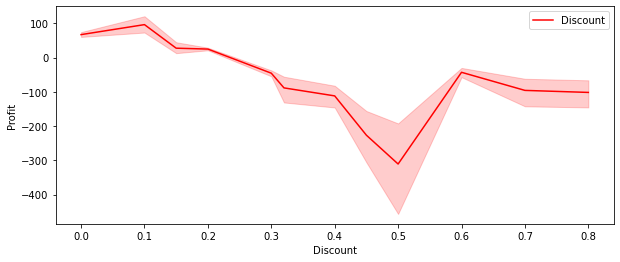

In [48]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = df, color = 'r', label= 'Discount')
plt.legend()

Observation: We can see that dicounts are causing losses.

8) Sales

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


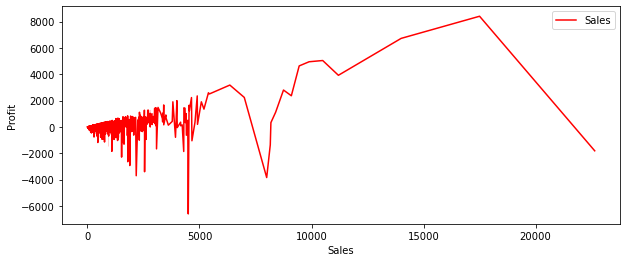

In [49]:
plt.figure(figsize = (10,4))
sns.lineplot('Sales', 'Profit', data = df, color = 'r', label= 'Sales')
plt.legend()

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


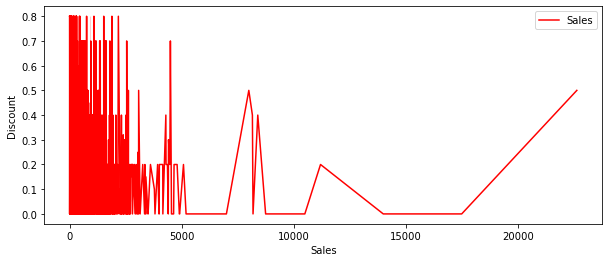

In [51]:
plt.figure(figsize = (10,4))
sns.lineplot('Sales', 'Discount', data = df, color = 'r', label= 'Sales')
plt.legend()

9) Quantity

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


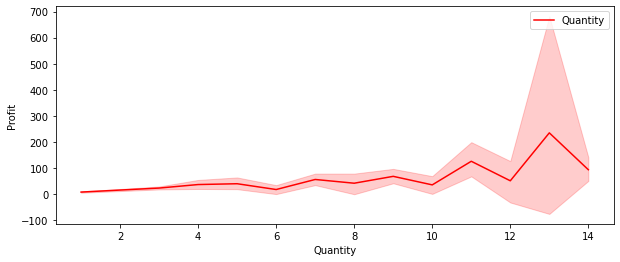

In [50]:
plt.figure(figsize = (10,4))
sns.lineplot('Quantity', 'Profit', data = df, color = 'r', label= 'Quantity')
plt.legend()

Observation: Higher sales are resulting higher profits.